In [23]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

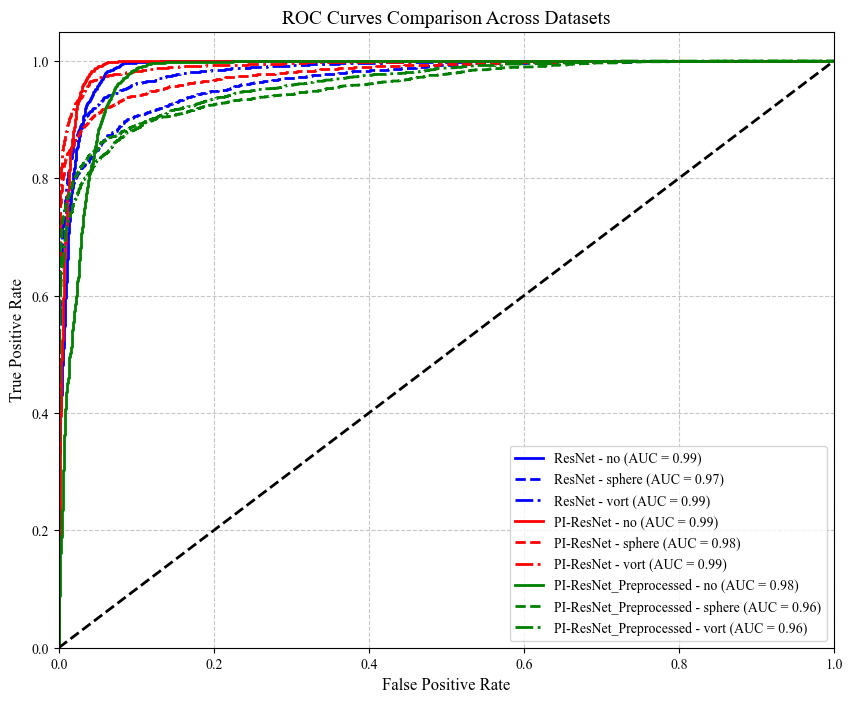

In [24]:
# Define the directories where your files are stored
dirs = [
    "log/ROC/resnet",  
    "log/ROC/pi_resnet", 
    "log/ROC/pi_resnet_preprocessed"   
]

# Colors and labels for each dataset
colors = ['blue', 'red', 'green']
dataset_labels = ['ResNet', 'PI-ResNet', 'PI-ResNet_Preprocessed']  # Customize these labels

# Initialize the plot
plt.figure(figsize=(10, 8))

# Load and plot ROC curves for each directory
for idx, dir_path in enumerate(dirs):
    # Load ROC data from pickle file
    with open(os.path.join(dir_path, "roc_curves.pkl"), "rb") as f:
        roc_data = pickle.load(f)
    
    # Extract data
    fpr = roc_data["fpr"]
    tpr = roc_data["tpr"]
    roc_auc = roc_data["roc_auc"]
    class_names = roc_data["class_names"]
    num_classes = len(class_names)

    # Plot ROC curves for each class
    for i in range(num_classes):
        # Use a unique color for each dataset, and linestyle for each class
        linestyle = ['-', '--', '-.'][i % 3]  # Cycle through linestyles for classes
        label = f"{dataset_labels[idx]} - {class_names[i]} (AUC = {roc_auc[i]:.2f})"
        plt.plot(fpr[i], tpr[i], color=colors[idx], linestyle=linestyle, lw=2, label=label)

# Add diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison Across Datasets')
plt.legend(loc="lower right", bbox_to_anchor=(1.0, 0.0))  # Adjust legend position
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

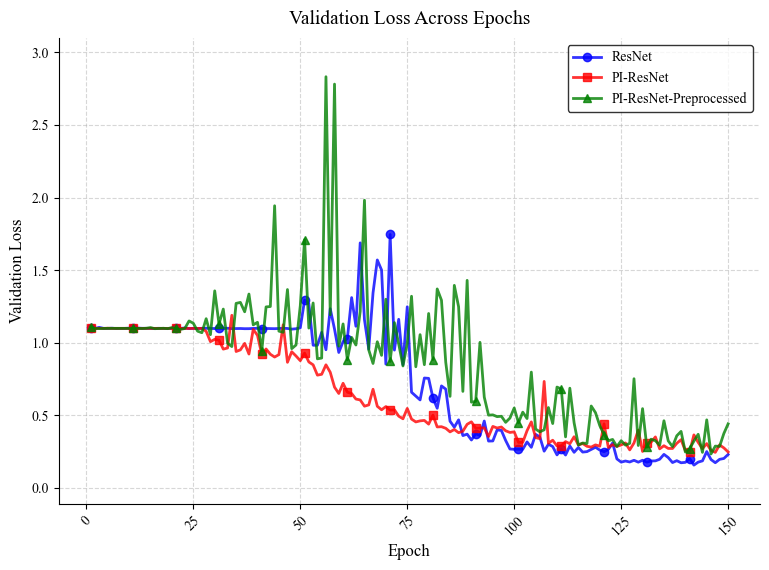

In [25]:
import matplotlib.pyplot as plt

# Set Matplotlib parameters for academic style
plt.rcParams.update({
    'font.family': 'Times New Roman',  # Common font for academic papers
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 10,
    'lines.linewidth': 2,
    'grid.linestyle': '--',
    'grid.alpha': 0.5,
})

# Function to read data from txt file using line numbers as epochs, limited to 150 lines
def read_loss_data(filename, max_lines=150):
    losses = []
    try:
        with open(filename, 'r') as file:
            for i, line in enumerate(file, 1):
                if i > max_lines:
                    break
                _, loss = line.strip().split(',')
                losses.append(float(loss))
        epochs = list(range(1, len(losses) + 1))
        return epochs, losses
    except FileNotFoundError:
        print(f"Error: File {filename} not found")
        return None, None
    except ValueError:
        print(f"Error: Invalid data format in {filename}")
        return None, None

# Specify your models and their file paths here
models = {
    'ResNet': 'log/resnet_val_loss.txt',
    'PI-ResNet': 'log/pi_resnet_val_loss.txt',
    'PI-ResNet-Preprocessed': 'log/pi_resnet_preprocessed_val_loss.txt',
}

# Colors and styles for plots (added green)
colors = ['blue', 'red', 'green'] 
plot_styles = ['-o', '-s', '-^']  # Circle, square, and triangle markers

# Dictionary to store all data
all_data = {}

# Read data for each specified model
for model_name, filepath in models.items():
    epochs, losses = read_loss_data(filepath)
    if epochs and losses:
        all_data[model_name] = (epochs, losses)

# Create the plot if we have any data
if all_data:
    plt.figure(figsize=(8, 6))  # Standard size for papers
    
    # Plot each dataset
    for i, (model_name, (epochs, losses)) in enumerate(all_data.items()):
        plt.plot(epochs, losses, 
                color=colors[i % len(colors)],
                linestyle='-', 
                marker=plot_styles[i % len(plot_styles)][-1],
                markersize=6,
                markevery=10,  # Show markers every 10 points
                label=model_name,
                alpha=0.8)

    # Customize the plot
    plt.title('Validation Loss Across Epochs', pad=10)
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    
    # Add grid
    plt.grid(True)
    
    # Set x-axis ticks
    all_epochs = [epoch for epochs, _ in all_data.values() for epoch in epochs]
    if all_epochs:
        max_epoch = min(max(all_epochs), 150)
        plt.xticks(range(0, max_epoch + 1, 25), rotation=45)
    
    # Adjust axis limits with some padding
    plt.margins(x=0.05, y=0.1)
    
    # Add legend
    plt.legend(loc='best', frameon=True, edgecolor='black')
    
    # Remove top and right spines
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Tight layout with adjusted padding
    plt.tight_layout(pad=1.5)

    # Show the plot
    plt.show()
else:
    print("No valid validation loss data found for the specified models")